# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 600s 4us/step


In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [22]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [23]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [18]:
#針對物件圖像數據集的類別編列成字典

label_dict={
    0:"mammals beaver",
    1:"dolphin",
    2:"otter",
    3:"seal",
    4:"whale",
    5:"aquarium fish",
    6:"flatfish",
    7:"ray",
    8:"shark",
    9:"trout",
    10:"orchids",
    11:"poppies",
    12:"roses",
    13:"sunflowers",
    14:"tulips",
    15:"containers bottles",
    16:"bowls",
    17:"cans",
    18:"cups",
    19:"plates",
    20:"apples",
    21:"mushrooms",
    22:"oranges",
    23:"pears",
    24:"sweet peppers",
    25:"clock",
    26:"computer keyboard",
    27:"lamp",
    28:"telephone",
    29:"television",
    30:"furniture bed",
    31:"chair",
    32:"couch",
    33:"table",
    34:"wardrobe",
    35:"bee",
    36:"beetle",
    37:"butterfly",
    38:"caterpillar",
    39:"cockroach",
    40:"bear",
    41:"leopard",
    42:"lion",
    43:"tiger",
    44:"wolf",
    45:"bridge",
    46:"castle",
    47:"house",
    48:"road",
    49:"skyscraper",
    50:"cloud",
    51:"forest",
    52:"mountain",
    53:"plain",
    54:"sea",
    55:"camel",
    56:"cattle",
    57:"chimpanzee",
    58:"elephant",
    59:"kangaroo",
    60:"fox",
    61:"porcupine",
    62:"possum",
    63:"raccoon",
    64:"skunk",
    65:"crab",
    66:"lobster",
    67:"snail",
    68:"spider",
    69:"worm",
    70:"baby",
    71:"boy",
    72:"girl",
    73:"man",
    74:"woman",
    75:"crocodile",
    76:"dinosaur",
    77:"lizard",
    78:"snake",
    79:"turtle",
    80:"hamster",
    81:"mouse",
    82:"rabbit",
    83:"shrew",
    84:"squirrel",
    85:"maple",
    86:"oak",
    87:"palm",
    88:"pine",
    89:"willow",
    90:"bicycle",
    91:"bus",
    92:"motorcycle",
    93:"pickup truck",
    94:"train",
    95:"lawn-mower",
    96:"rocket",
    97:"streetcar",
    98:"tank",
    99:"tractor"
}

In [19]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

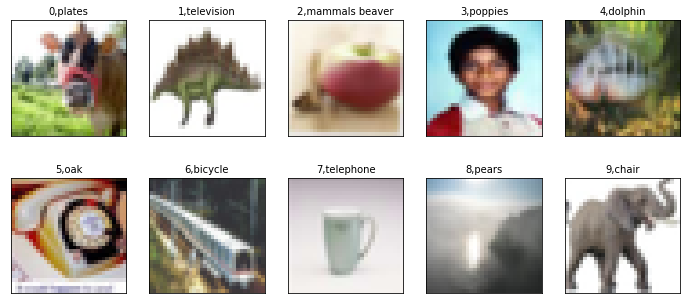

In [20]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [21]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [24]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [25]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [26]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [27]:
y_label_train.shape

(50000, 1)

In [28]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [29]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [30]:
y_label_train_OneHot.shape

(50000, 100)

In [31]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

### 小結

CIFAR100 比 CIFAR10 多了更細小的類別，前者共有 100 類，後者僅有 10 類。